<a href="https://colab.research.google.com/github/AkshayAI007/Cardiovascular-disease-risk-prediction-using-Machine-learning/blob/main/Predicting_Cardiovascular_disease_risk_using_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardiovascular Risk Prediction**

**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.**

**Variables**

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors. 

## **Data Description**

**Demographic:**

- **Sex:** male or female("M" or "F")
- **Age:** Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**

- **is_smoking:** whether or not the patient is a current smoker ("YES" or "NO")
- **Cigs Per Day:** the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**
- **BP Meds:** whether or not the patient was on blood pressure medication (Nominal)
- **Prevalent Stroke:** whether or not the patient had previously had a stroke (Nominal)
- **Prevalent Hyp:** whether or not the patient was hypertensive (Nominal)
- **Diabetes:** whether or not the patient had diabetes (Nominal)

**Medical(current)**
- **Tot Chol:** total cholesterol level (Continuous)
- **Sys BP:** systolic blood pressure (Continuous)
- **Dia BP:** diastolic blood pressure (Continuous)
- **BMI:** Body Mass Index (Continuous)
- **Heart Rate:** heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- **Glucose:** glucose level (Continuous)

**Predict variable (desired target)**
- **10-year risk of coronary heart disease CHD**(binary: “1”, means “Yes”, “0” means “No”) - DV

In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#For Handling Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Reading the File 

In [ ]:
#Reading csv file
cardio_df = pd.read_csv('/content/data_cardiovascular_risk.csv')

#Exploring the Dataset

In [ ]:
#Checking first 5 rows of dataset
cardio_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
#Checking bottom 5 rows of dataset
cardio_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
#Checking Shape of Dataset
cardio_df.shape

(3390, 17)

In [ ]:
#Knowing the features of the dataset
print("Features of the dataset: ")
cardio_df.columns

Features of the dataset: 


Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
#Understanding the datatype of each Feature/column
cardio_df.dtypes

id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [ ]:
#Detailed information about dataset
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
#Finding total number of unique values of feature
cardio_df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

In [ ]:
#Checking the statistical description of the dataset
cardio_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
#Creating copy of dataset before working with it so that original data remains unaltered
df = cardio_df.copy()

In [ ]:
#Checking for Null Values
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

From above we can see that we have missing values in our dataset. Since our project deals with predicting cardiovascular risk, missing or null values of the independent feature is 

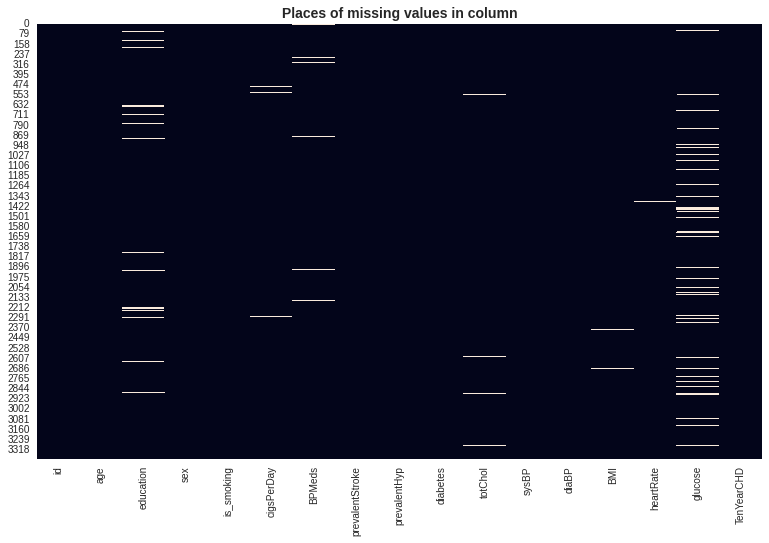

In [ ]:
#Checking for missing values in our dataset with the help of heatmap.
plt.figure(figsize = (13,8))
sns.heatmap(df.isna(), cbar=False)
plt.title('Places of missing values in column',weight = 'bold', fontsize = 14)
plt.show()

In [ ]:
#Percentage of missing data per category
Total_missing_data = df.isna().sum().sort_values(ascending = False)
Total_percentage = (df.isna().sum() / df.isna().count()).sort_values(ascending = False) * 100
missing_data_concat = pd.concat([Total_missing_data, round((Total_percentage),2)], axis = 1, keys = ["Total No of Missing Values", "Percentage of Missing Values"])
missing_data = missing_data_concat[missing_data_concat['Total No of Missing Values']>0]
missing_data

,Total No of Missing Values,Percentage of Missing Values
glucose,304,8.97
education,87,2.57
BPMeds,44,1.30
totChol,38,1.12
cigsPerDay,22,0.65
BMI,14,0.41
heartRate,1,0.03


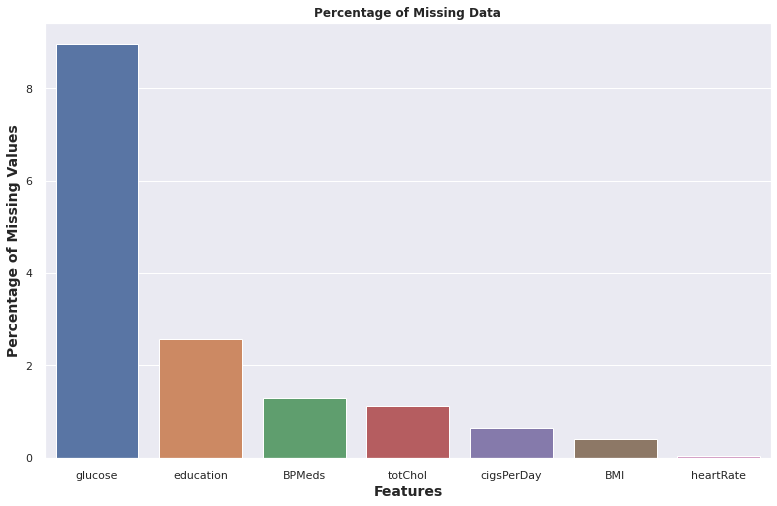

In [ ]:
plt.figure(figsize = (13,8))
sns.set(style = 'darkgrid')
sns.barplot(x = missing_data.index, y = missing_data['Percentage of Missing Values'], data = missing_data)
plt.title('Percentage of Missing Data', weight = 'bold')
plt.xlabel('Features', fontsize = 14, weight = 'bold')
plt.ylabel('Percentage of Missing Values', fontsize = 14, weight = 'bold')
plt.show();

From the above plot it is clear that the feature 'glucose' has maximum number of missing values i.e. 8.97% of the total data is missing. It requires a special attention as it will be critical in our model's performance. 

In [ ]:
#Total Number of Null Values
print("Total number of null values in the data set : "  , df.isna().sum().sum())

#Counting all the rows which contain missing values
count = 0
for i in df.isna().sum(axis = 1) :
  if i>0 :
    count = count + 1
print('Total number of rows with missing values is ', count)
print(f'Percentage of rows which are having missing values in the entire datset : {round((count/ len(df.index))*100, 2)} %')

Total number of null values in the data set :  510
Total number of rows with missing values is  463
Percentage of rows which are having missing values in the entire datset : 13.66 %


Replacing the missing values in the categorical columns with it's mode

In [ ]:
#Replacing the missing values in the categorical columns with its mode
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])

In [ ]:
#Checking for the missing values in the categorical columns
print("Total missing values in column 'Education' after Mode imputation : ", df['education'].isna().sum())
print("Total missing values in column 'BPMeds' after Mode imputation : ", df['BPMeds'].isna().sum())

Total missing values in column 'Education' after Mode imputation :  0
Total missing values in column 'BPMeds' after Mode imputation :  0


To handle missing values it is important to consider the distribution of the variables.Based on the distribution which the features follow, it would be statistically driven decision to choose to replace the missing values with the median or the mode of the data distribution

In [ ]:
#Assigning the variable names containing missing values
missing_cont_var = ['glucose', 'totChol', 'cigsPerDay', 'BMI', 'heartRate' ]

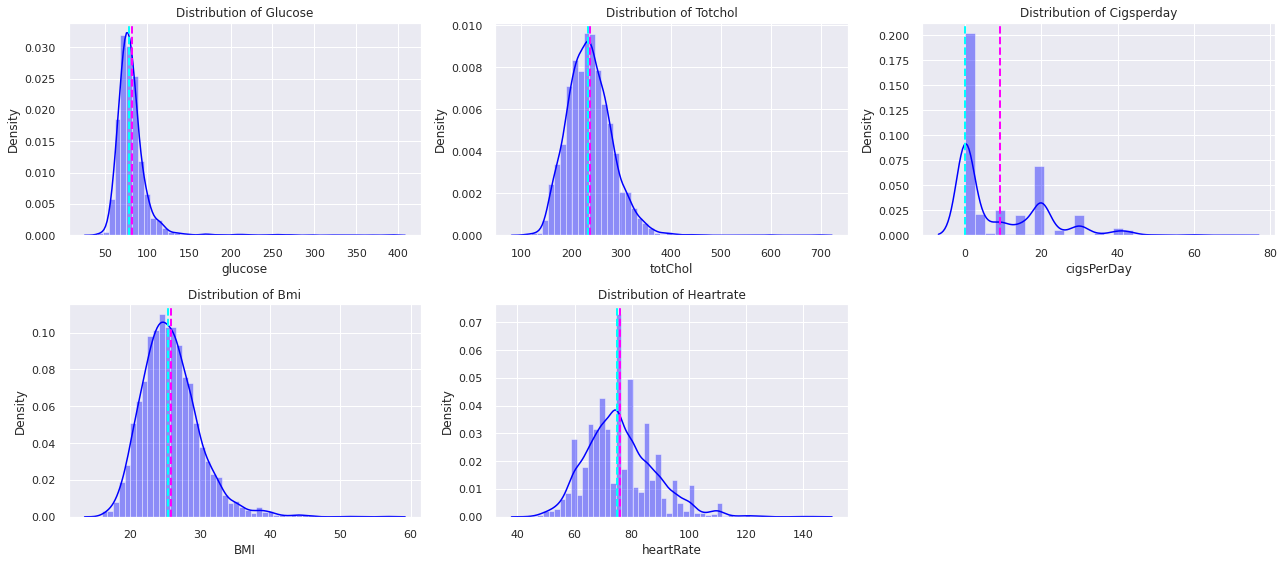

In [ ]:
#Visualizing the distribution plot of variables which contains missing values
fig = plt.figure(figsize = (18,8))
for index,column in enumerate(missing_cont_var) :
  plt.subplot(2,3,index+1)
  sns.distplot(df[column], color = 'blue')
  feature = df[column]
  ax = fig.gca()
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(f'Distribution of {column.title()}')
  plt.tight_layout()

From the plots it is visible that the distribution is skewed . It is advisable to fill the missing values with meadian 

In [ ]:
#Replacing the missing values with the help of median
for column in missing_cont_var :
  df[column] = df[column].fillna(df[column].median())

In [ ]:
#Let's check for missing values
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
#Checking if any duplicate is present
df.duplicated().sum()

0

The 'id' column of our dataset must not be considered in the analysis as it is just for the reference of patient and does not actually contribute in disease.Hence, dropping the 'id' column

In [ ]:
#Dropping the 'ID' column 
df.drop(columns = ['id'], inplace = True)